In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.signal as signal
import scipy.io.wavfile as wavfile
from glob import glob
import seaborn as sns 
from scipy.signal import spectrogram


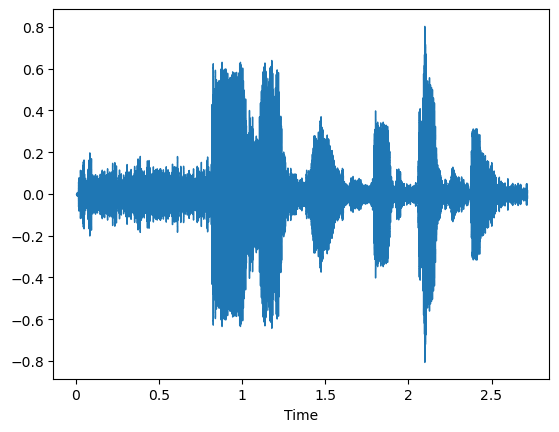

In [2]:
y, sr = librosa.load('WhatsApp Ptt 2024-02-05 at 3.14.44 PM.wav')
librosa.display.waveshow(y)
a = glob('WhatsApp Ptt 2024-02-05 at 3.14.44 PM.wav')
ipd.Audio(a[0])


In [3]:
# Using numpy.fft.fft() for transforming the speech signal to its spectral domain
fft_result = np.fft.fft(y)
print("after fft:")
ipd.display(ipd.Audio(fft_result, rate=sr))

after fft:


D:\anaconda\Lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


amplitude spectrum


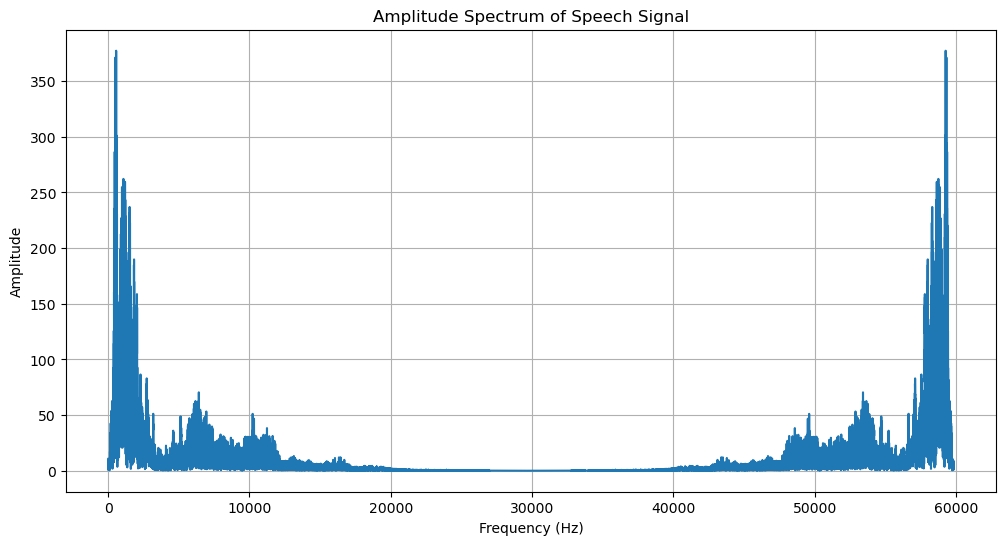

In [4]:
# Calculating the amplitude spectrum
amplitude_spectrum = np.abs(fft_result)
print("amplitude spectrum")
ipd.display(ipd.Audio(amplitude_spectrum, rate=sr))
plt.figure(figsize=(12, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [5]:
ifft_result = np.fft.ifft(fft_result)
print("after reconstruction")
ipd.Audio(np.real(ifft_result), rate=sr)

after reconstruction


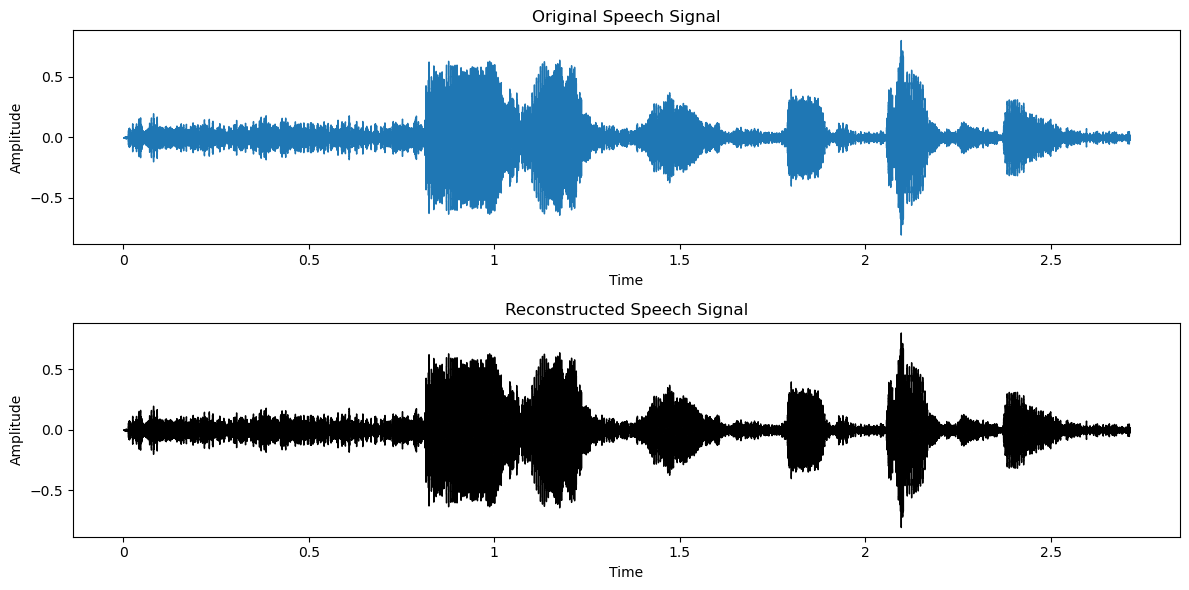

In [6]:
plt.figure(figsize=(12, 6))

# Plotting the original signal
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plotting the reconstructed signal
plt.subplot(2, 1, 2)
librosa.display.waveshow(np.real(ifft_result), sr=sr, color='black')  # Use np.real() to extract the real part
plt.title('Reconstructed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [7]:
def apply_window_and_inverse_transform(fft_data, window):
    # Applying the window to the spectrum
    windowed_spectrum = fft_data * window

    # Inverse transform the filtered spectrum
    filtered_signal = np.fft.ifft(windowed_spectrum)
    return filtered_signal

In [8]:
# Rectangular window for low-pass filter
low_pass_window = np.ones_like(fft_result)
low_pass_cutoff = 500  # Adjust the cutoff frequency as needed
low_pass_window[low_pass_cutoff:] = 0  # Zero out frequencies above the cutoff


In [9]:
# Applying the low-pass window and inverse transform
filtered_low_pass = apply_window_and_inverse_transform(fft_result, low_pass_window)

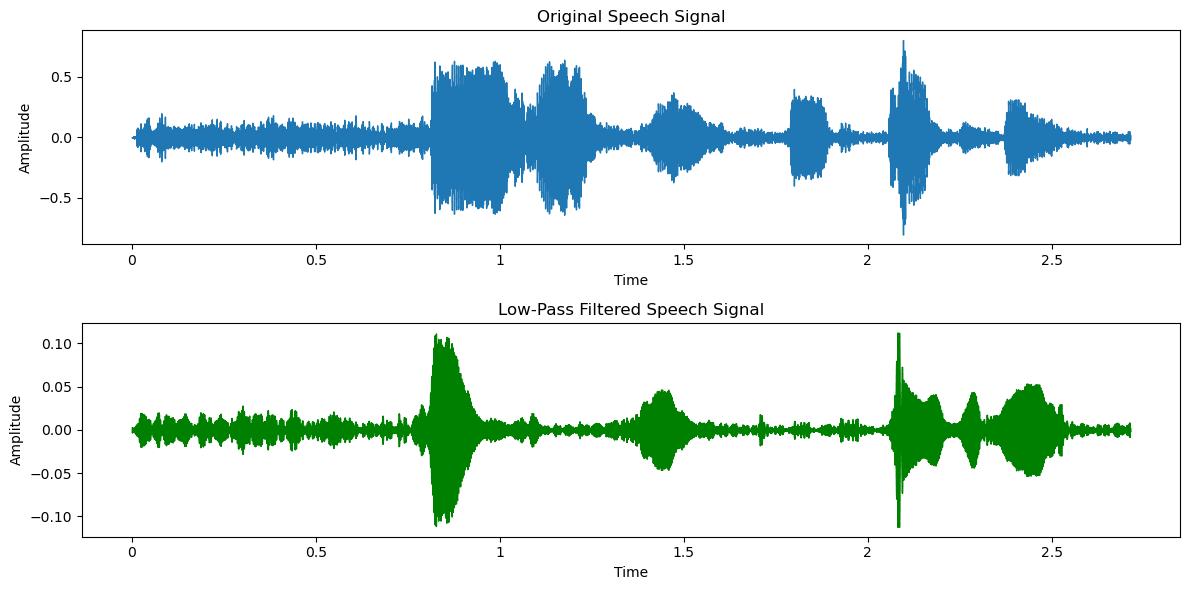

In [10]:
# Plotting the original and low-pass filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
librosa.display.waveshow(np.real(filtered_low_pass), sr=sr, color='green')
plt.title('Low-Pass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [11]:
ipd.Audio(np.real(filtered_low_pass), rate=sr)

In [12]:
# Bandpass filter window
bandpass_window = np.zeros_like(fft_result)
bandpass_low_cutoff = 500  # Adjust the lower cutoff frequency as needed
bandpass_high_cutoff = 1500  # Adjust the upper cutoff frequency as needed
bandpass_window[bandpass_low_cutoff:bandpass_high_cutoff] = 1



In [13]:
filtered_bandpass = apply_window_and_inverse_transform(fft_result, bandpass_window)

Text(100.97222222222221, 0.5, 'Amplitude')

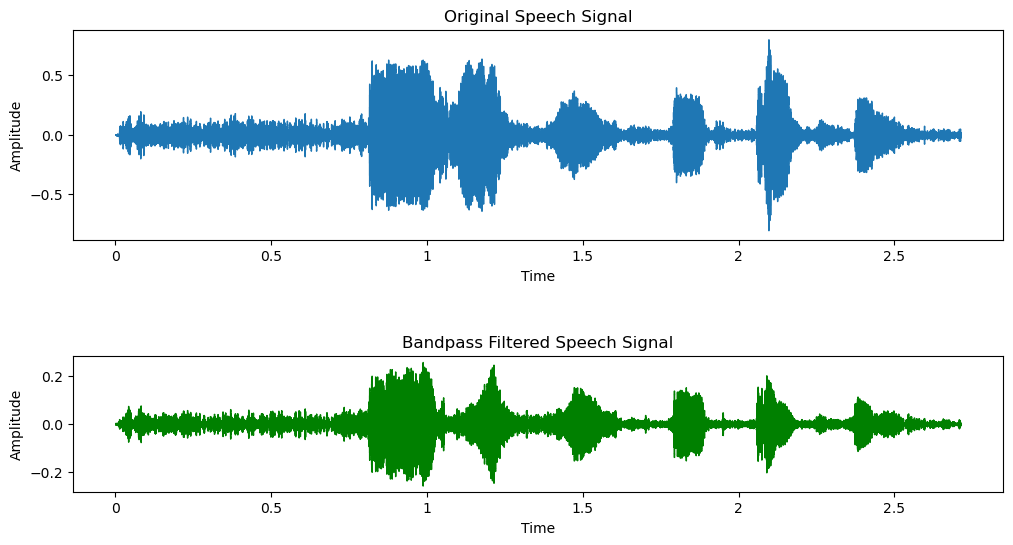

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.subplot(3, 1, 3)
librosa.display.waveshow(np.real(filtered_bandpass), sr=sr, color='green')
plt.title('Bandpass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

In [15]:
ipd.Audio(np.real(filtered_bandpass), rate=sr)
high_pass_window = np.ones_like(fft_result)
high_pass_cutoff = 1500  # Adjust the cutoff frequency as needed
high_pass_window[:high_pass_cutoff] = 0  # Zero out frequencies below the cutoff


In [16]:
# Applying the high-pass window and inverse transform
filtered_high_pass = apply_window_and_inverse_transform(fft_result, high_pass_window)

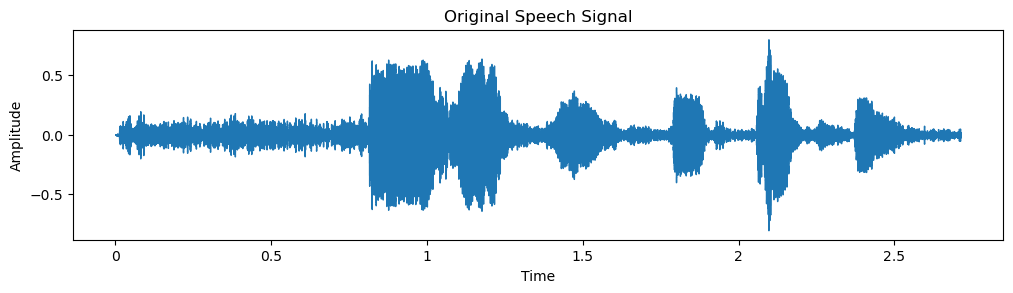

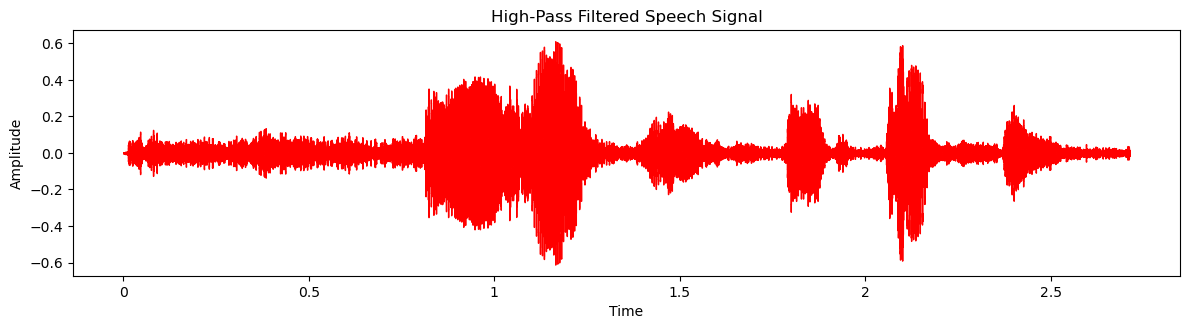

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(np.real(filtered_high_pass), sr=sr, color='red')
plt.title('High-Pass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [18]:
ipd.Audio(np.real(filtered_high_pass), rate=sr)


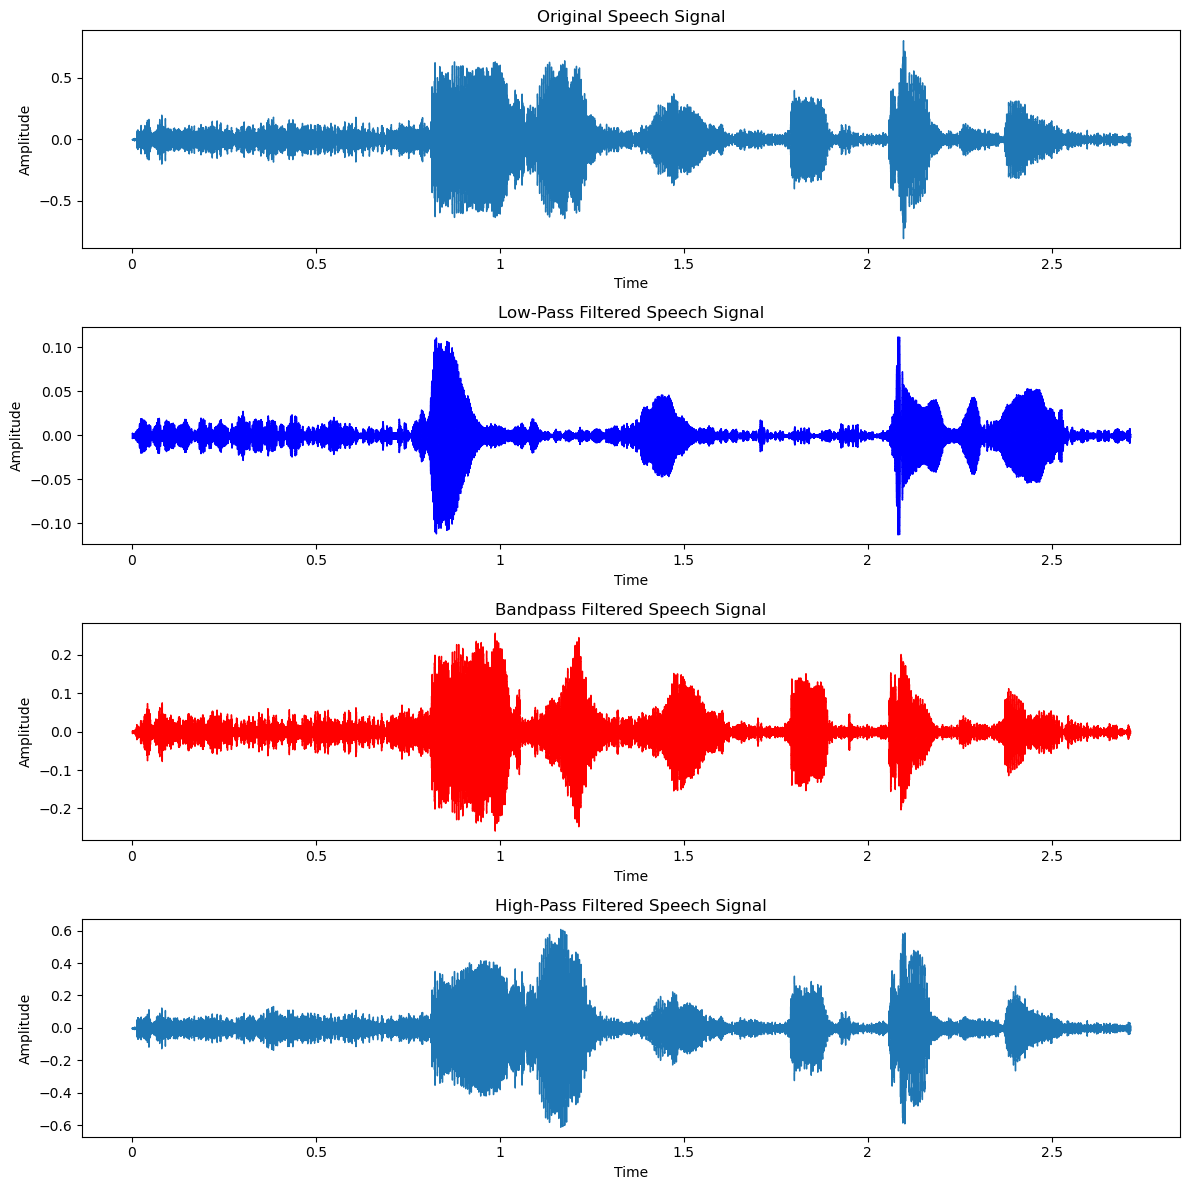

In [19]:
plt.figure(figsize=(12, 12))

# Original Speech Signal
plt.subplot(4, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Low-Pass Filtered Speech Signal
plt.subplot(4, 1, 2)
librosa.display.waveshow(np.real(filtered_low_pass), sr=sr, color='blue')
plt.title('Low-Pass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Bandpass Filtered Speech Signal
plt.subplot(4, 1, 3)
librosa.display.waveshow(np.real(filtered_bandpass), sr=sr, color='red')
plt.title('Bandpass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# High-Pass Filtered Speech Signal
plt.subplot(4, 1, 4)
librosa.display.waveshow(np.real(filtered_high_pass), sr=sr)
plt.title('High-Pass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


#  A3. Repeat A2 with other filter types such as Cosine / Gausian filters. 

In [20]:
cosine_window = np.cos(np.linspace(0, np.pi, len(fft_result)))
cosine_window /= np.max(cosine_window)  

In [21]:
filtered_cosine = apply_window_and_inverse_transform(fft_result, cosine_window)

Text(4.347222222222216, 0.5, 'Amplitude')

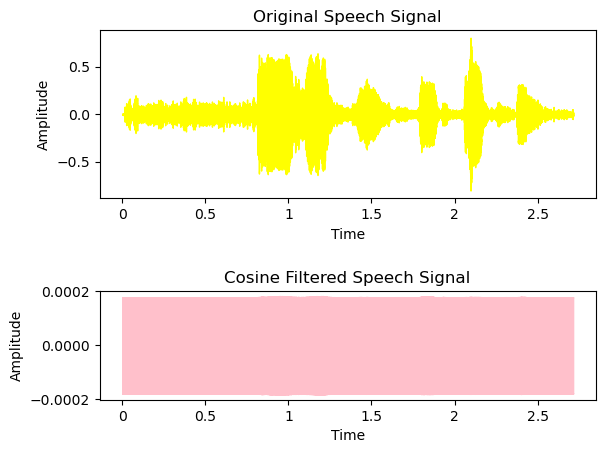

In [22]:
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='yellow')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3,1,3)
librosa.display.waveshow(np.real(filtered_cosine), sr=sr, color='pink')
plt.title('Cosine Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

In [23]:
ipd.Audio(np.real(filtered_cosine), rate=sr)